In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('modified_medical_data.csv')

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Medicines,Age Group,Gender,Severity of Symptoms
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Fungal infection,"Diphenhydramine, Hydrocortisone, Cyclosporine",Child,Female,Mild
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Fungal infection,"Hydrocortisone, Cyclosporine,",Child,Male,Moderate
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Fungal infection,"Diphenhydramine, Cyclosporine,",Child,Female,Mild
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Fungal infection,"Diphenhydramine, Hydrocortisone,",Child,Male,Severe
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Fungal infection,"Diphenhydramine, Hydrocortisone, Cyclosporine",Child,Female,Mild


In [4]:
df.info

<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0

In [5]:
df.shape

(4920, 136)

In [6]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
prognosis               0
Medicines               0
Age Group               0
Gender                  0
Severity of Symptoms    0
Length: 136, dtype: int64

In [7]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        print(f"\nUnique values in {col}: {unique_values}")


Unique values in prognosis: 41

Unique values in Medicines: 301

Unique values in Age Group: 3

Unique values in Gender: 2

Unique values in Severity of Symptoms: 3


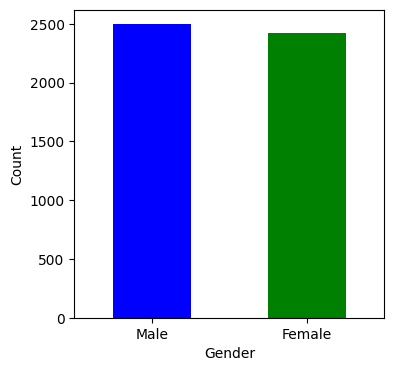

Counter({'Male': 2496, 'Female': 2424})

In [9]:
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()
Counter(df.Gender)

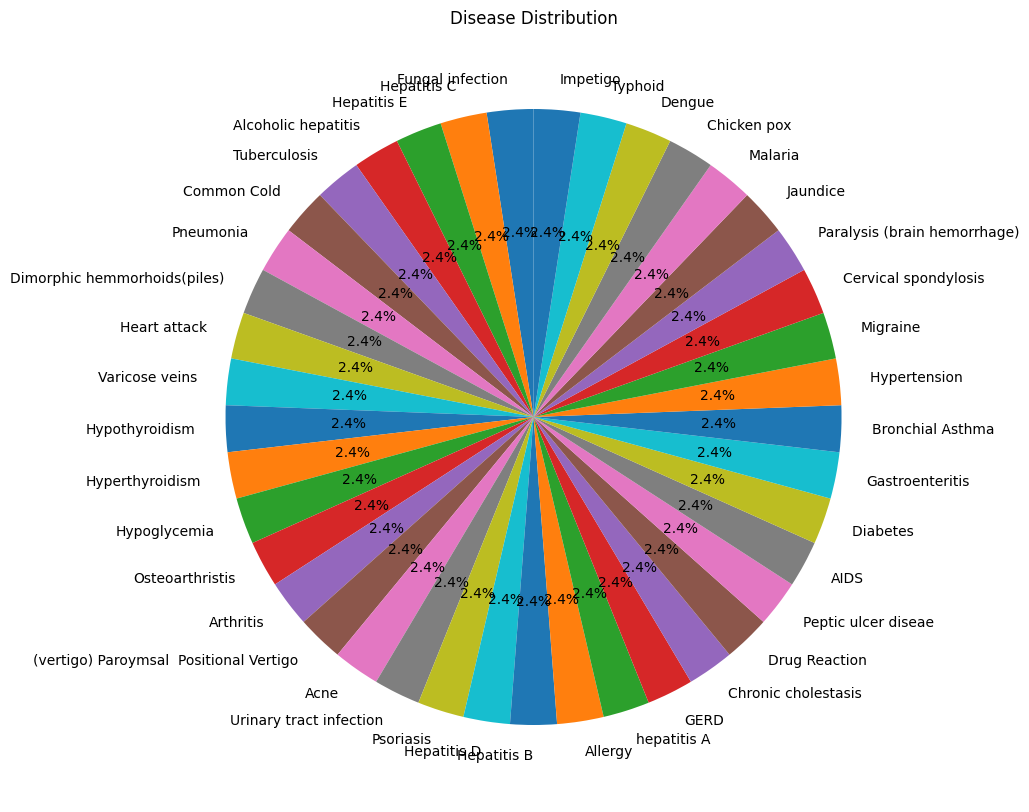

In [10]:
# Create a pie chart
plt.figure(figsize=(10, 10))
df['prognosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Disease Distribution')
plt.ylabel(' ')  # Remove the y-label for better aesthetics
plt.show()

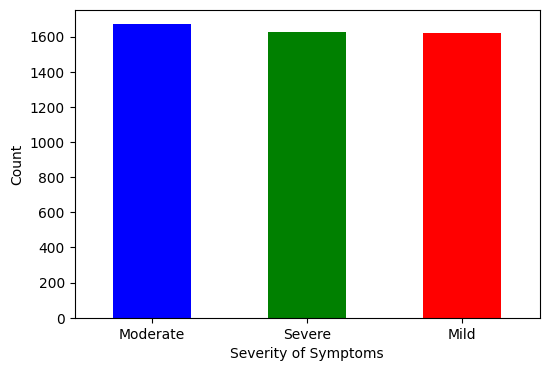

In [11]:
plt.figure(figsize=(6,4))
df['Severity of Symptoms'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Severity of Symptoms')
plt.xticks(rotation=0)
plt.show()

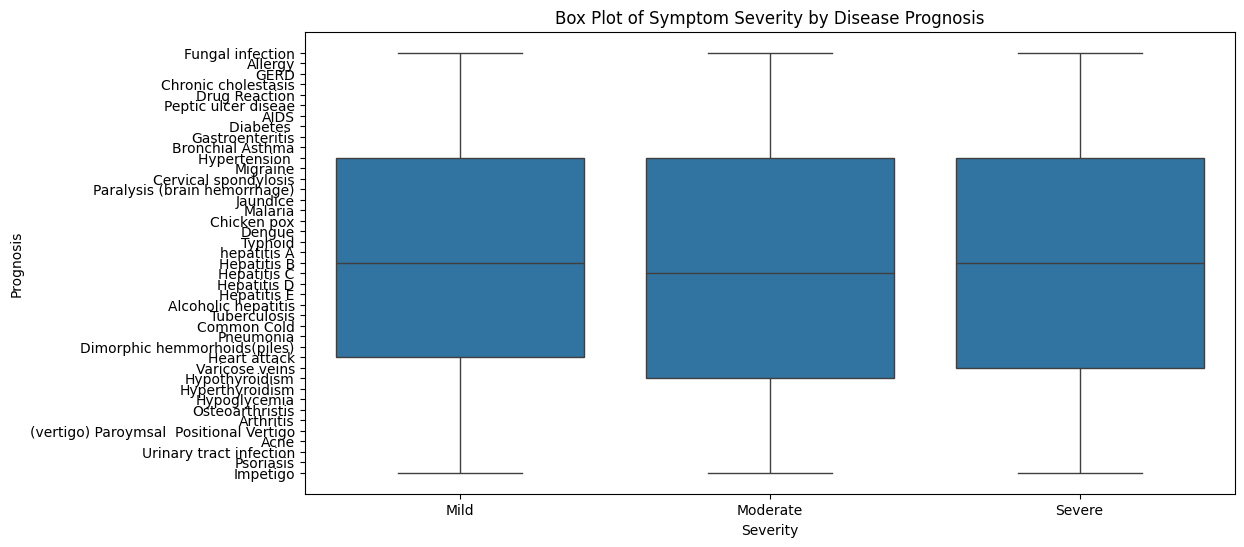

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Severity of Symptoms', y='prognosis', data=df)
plt.title('Box Plot of Symptom Severity by Disease Prognosis')
plt.xlabel('Severity')
plt.ylabel('Prognosis')
plt.show()

In [13]:
X = df.drop(columns=['prognosis', 'Medicines'])  # Replace 'disease' and 'medicine' with actual column names
y_disease = df['prognosis']
y_medicine = df['Medicines']

In [14]:
le_disease = LabelEncoder()
y_disease_encoded = le_disease.fit_transform(y_disease)
y_disease_encoded

array([15, 15, 15, ..., 38, 35, 27])

In [15]:
le_medicine = LabelEncoder()
y_medicine_encoded = le_medicine.fit_transform(y_medicine)
y_medicine_encoded

array([ 97, 124,  88, ..., 217, 138, 122])

In [16]:
y_combined = pd.DataFrame({'disease': y_disease_encoded, 'medicine': y_medicine_encoded})
y_combined.head()

,disease,medicine
0,15,97
1,15,124
2,15,88
3,15,89
4,15,97


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

In [18]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Age Group', 'Gender', 'Severity of Symptoms']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
model_pipeline = Pipeline([
    ('preprocessor', transformer),
    ('algo',rfc)
])

In [21]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Age Group', 'Gender',
                                                   'Severity of Symptoms'])])),
                ('algo', RandomForestClassifier(random_state=42))])

In [22]:
y_pred = model_pipeline.predict(X_test)
y_pred

array([[  2, 141],
       [  2, 144],
       [ 24,  34],
       ...,
       [ 11, 130],
       [  2, 142],
       [ 17, 259]])

In [23]:
disease_accuracy = accuracy_score(y_test['disease'], y_pred[:, 0])
medicine_accuracy = accuracy_score(y_test['medicine'], y_pred[:, 1])

In [24]:
print(f"Disease Prediction Accuracy: {disease_accuracy:.2f}")
print(f"Medicine Prediction Accuracy: {medicine_accuracy:.2f}")

Disease Prediction Accuracy: 1.00
Medicine Prediction Accuracy: 0.82


In [25]:
from sklearn.metrics import classification_report
print("Classification Report for Disease Predictions:")
print(classification_report(y_test['disease'], y_pred[:, 0], 
                            target_names=le_disease.classes_,
                            labels=le_disease.transform(le_disease.classes_)))

Classification Report for Disease Predictions:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00 

In [26]:
medicine_report = classification_report(y_test['medicine'], y_pred[:, 1], 
                                        target_names=le_medicine.classes_,
                                        labels=le_medicine.transform(le_medicine.classes_),  # Ensure consistent labels
                                        zero_division=0)  # Handle any division by zero
medicine_df = pd.DataFrame(medicine_report).transpose()  # Convert to DataFrame
print(medicine_df)

ValueError: DataFrame constructor not properly called!

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR PIPELINE')